In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [100]:
df = pd.read_csv('diabetes.csv')[['Glucose', 'Insulin']]
glucose = df['Glucose'][df['Glucose'] != 0] / 200
insulin = df['Insulin'] / 900 + 0.001

glucose_train, glucose_test = train_test_split(glucose, test_size=.5, random_state=42, shuffle=True)
insulin_train, insulin_test = train_test_split(insulin, test_size=.5, random_state=42, shuffle=True)

0.07921890266781872
0.059009962061863715


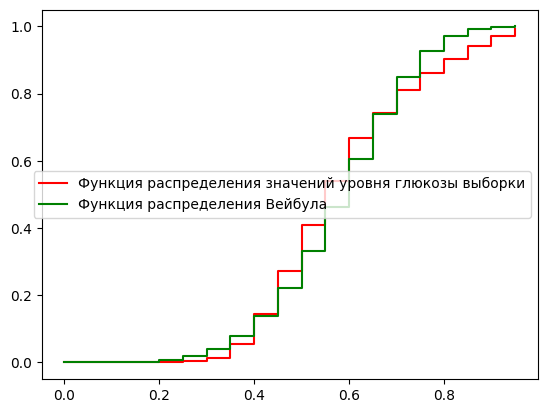

In [101]:
distribution_glucose = lambda x: sum(glucose <= x) / len(df)
distribution_veibul = lambda x: 1 - np.exp(-(x/.66) ** 5)

step = 0.05
x = np.arange(0, 1, step)

plt.plot(
    [i for i in x for _ in range(2)],
    [distribution_glucose(i + s) for i in x for s in [0, step]],
    color='red', label='Функция распределения значений уровня глюкозы выборки')

plt.plot(
    [i for i in x for _ in range(2)],
    [distribution_veibul(i + s) for i in x for s in [0, step]],
    color='green', label='Функция распределения Вейбула')


print(max([abs(distribution_glucose(i) - distribution_veibul(i)) for i in x]))
print(1.63 / len(glucose) ** .5)

plt.legend()
plt.show()

0.05029397862086116
0.05881755867369312


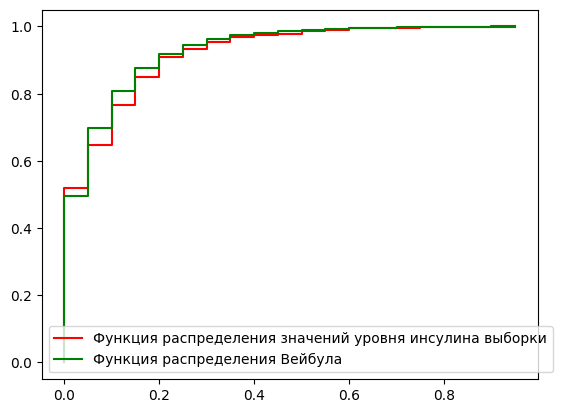

In [102]:
distribution_glucose = lambda x: sum(insulin <= x) / len(df)
distribution_veibul = lambda x: 1 - np.exp(-(x/.08) ** .8)

step = 0.05
x = np.arange(0, 1, step)

plt.plot(
    [i for i in x for _ in range(2)],
    [distribution_glucose(i + s) for i in x for s in [0, step]],
    color='red', label='Функция распределения значений уровня инсулина выборки')

plt.plot(
    [i for i in x for _ in range(2)],
    [distribution_veibul(i + s) for i in x for s in [0, step]],
    color='green', label='Функция распределения Вейбула')


print(max([abs(distribution_glucose(i) - distribution_veibul(i)) for i in x]))
print(1.63 / len(insulin) ** .5)

plt.legend()
plt.show()

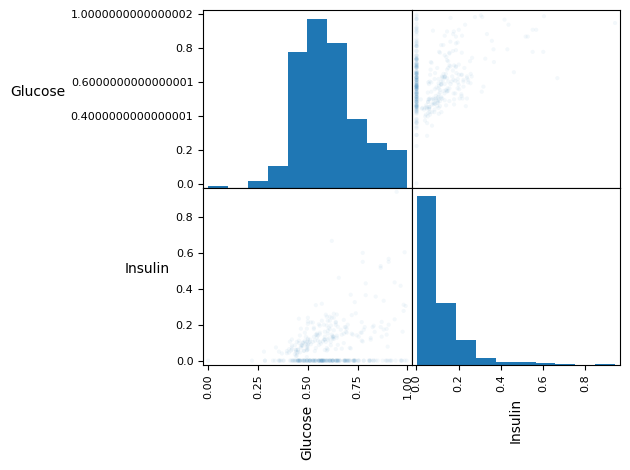

In [20]:
axes = pd.plotting.scatter_matrix(df_train, alpha=.05)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [105]:
n_glucose = len(glucose_train)
n_insulin = len(insulin_train)

avg_ln_glucose = 1 / n_glucose * sum(np.log(gl_val) for gl_val in glucose_train)
avg_ln_insulin = 1 / n_insulin * sum(np.log(ins_val) for ins_val in insulin_train)

S_2_glucose = 1 / n_glucose * sum((np.log(gl_val) - avg_ln_glucose) ** 2 for gl_val in glucose_train)
S_2_insulin = 1 / n_insulin * sum((np.log(ins_val) - avg_ln_insulin) ** 2 for ins_val in insulin_train)

beta_ = (S_2_glucose / S_2_insulin) ** .5
alpha_ = np.exp(avg_ln_glucose - beta_ * avg_ln_insulin)

0.21468695462478188
0.11786645506807676


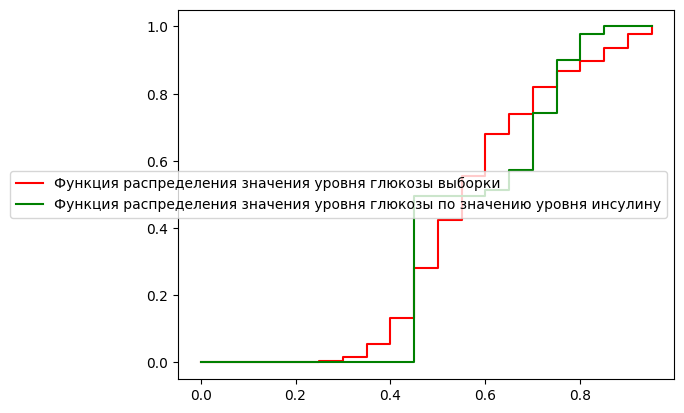

In [109]:
fact_distribution_glucose = lambda x: sum(glucose_test <= x) / len(glucose_test)
pred_distribution_glucose = lambda x: sum((alpha_ * insulin_test ** beta_) <= x) / len(insulin_test)

step = 0.05
x = np.arange(0, 1, step)

plt.plot(
    [i for i in x for _ in range(2)],
    [fact_distribution_glucose(i + s) for i in x for s in [0, step]],
    color='red', label='Функция распределения значения уровня глюкозы выборки')

plt.plot(
    [i for i in x for _ in range(2)],
    [pred_distribution_glucose(i + s) for i in x for s in [0, step]],
    color='green', label='Функция распределения значения уровня глюкозы по значению уровня инсулину')

print(max([abs(fact_distribution_glucose(i) - pred_distribution_glucose(i)) for i in x]))
print(1.63 * ((n_glucose + n_insulin) / (n_glucose * n_insulin)) ** .5)

plt.legend()
plt.show()

In [110]:
alpha_, beta_

(0.9131297343024166, 0.10032565108591668)